# 例1 遗传算法

利用遗传算法求Rosenbrock函数的极大值。

$$
\left\{\begin{array}{l}
f\left(x_1, x_2\right)=100\left(x_1^2-x_2\right)^2+\left(1-x_1\right)^2 \\
-2.048 \leq x_i \leq 2.048 \quad(i=1,2)
\end{array}\right.
$$

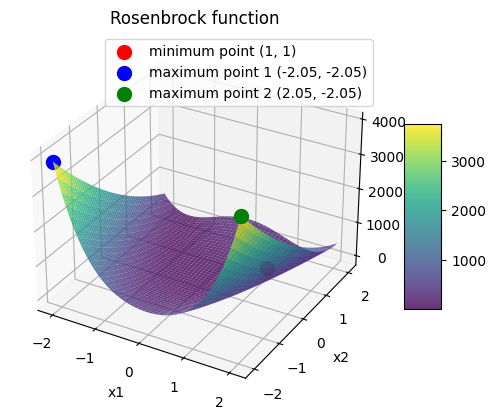

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# 定义Rosenbrock函数
def rosenbrock(x1, x2):
    return 100 * (x1**2 - x2)**2 + (1 - x1)**2

# 生成网格数据
x1 = np.linspace(-2.048, 2.048, 100)
x2 = np.linspace(-2.048, 2.048, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = rosenbrock(X1, X2)

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 标注极小值点
min_point = (1, 1)
ax.scatter(min_point[0], min_point[1], rosenbrock(*min_point), color='red', s=100, label='minimum point (1, 1)')

# 寻找极大值点
def neg_rosenbrock(x):
    return -rosenbrock(x[0], x[1])

# 第一个极大值点
max_result_1 = minimize(neg_rosenbrock, x0=[-2, 2], bounds=[(-2.048, 2.048), (-2.048, 2.048)])
max_point_1 = (max_result_1.x[0], max_result_1.x[1])
ax.scatter(max_point_1[0], max_point_1[1], rosenbrock(*max_point_1), color='blue', s=100, label=f'maximum point 1 ({max_point_1[0]:.2f}, {max_point_1[1]:.2f})')

# 第二个极大值点
max_result_2 = minimize(neg_rosenbrock, x0=[2, -2], bounds=[(-2.048, 2.048), (-2.048, 2.048)])
max_point_2 = (max_result_2.x[0], max_result_2.x[1])
ax.scatter(max_point_2[0], max_point_2[1], rosenbrock(*max_point_2), color='green', s=100, label=f'maximum point 2 ({max_point_2[0]:.2f}, {max_point_2[1]:.2f})')

# 设置标签
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rosenbrock function')
ax.legend()

# 显示图形
plt.show()

遗传算法代码如下：

Generation 0: Best Fitness = 3200.0866578009072, Best Objective = 0.00031249153755329796, x1 = 1.9599, x2 = -1.0150
Generation 1: Best Fitness = 3538.4199184428176, Best Objective = 0.00028261201978539577, x1 = -1.5475, x2 = -1.5996
Generation 2: Best Fitness = 3600.5348311969356, Best Objective = 0.0002777365160685218, x1 = -0.7427, x2 = -0.7467
Generation 3: Best Fitness = 3793.005955377453, Best Objective = 0.00026364313996983616, x1 = -1.7437, x2 = -0.5345
Generation 4: Best Fitness = 3793.005955377453, Best Objective = 0.00026364313996983616, x1 = 2.0440, x2 = -1.9799
Generation 5: Best Fitness = 3840.7333269212277, Best Objective = 0.0002603669442474962, x1 = -1.4915, x2 = 0.8668
Generation 6: Best Fitness = 3840.7333269212277, Best Objective = 0.0002603669442474962, x1 = -2.0440, x2 = -2.0120
Generation 7: Best Fitness = 3840.7333269212277, Best Objective = 0.0002603669442474962, x1 = -2.0440, x2 = -2.0120
Generation 8: Best Fitness = 3844.8495944874535, Best Objective = 0.00026

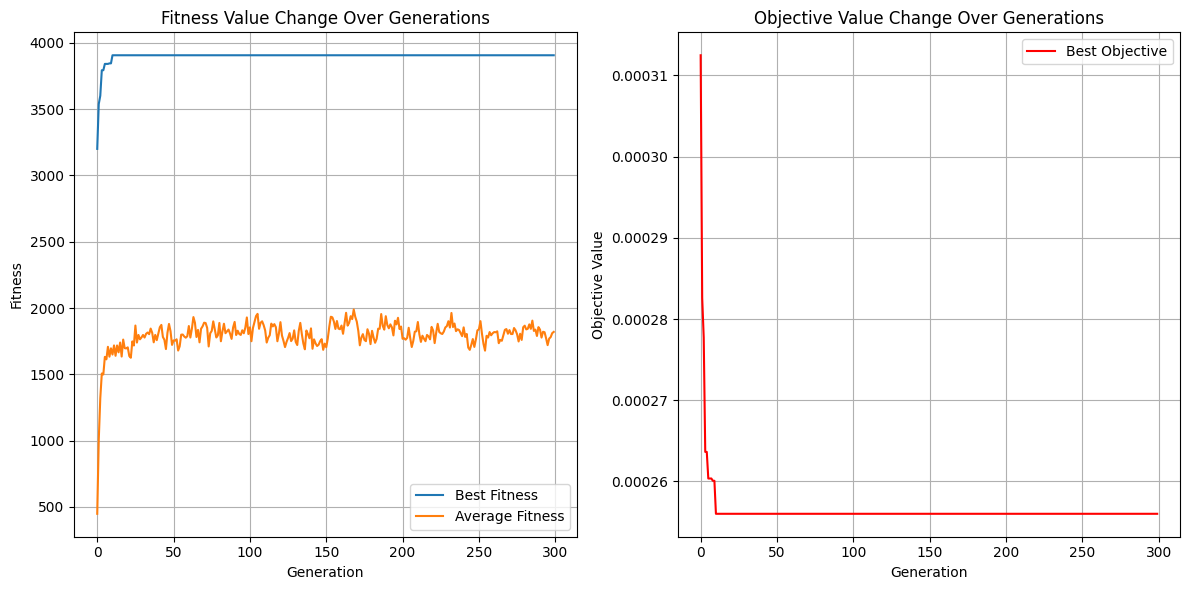


Best Solution: x1 = -1.4634, x2 = -0.9750, Fitness = 3905.9262


In [2]:
import numpy as np

# 定义Rosenbrock函数
def rosenbrock(x1, x2):
    return 100 * (x1**2 - x2)**2 + (1 - x1)**2

# 编码长度
BITS = 10
CHROMOSOME_LENGTH = 2 * BITS

# 解码函数
def decode(chromosome):
    # 将染色体分为x1和x2
    x1_bin = chromosome[:BITS]
    x2_bin = chromosome[BITS:]
    
    # 将二进制转换为十进制
    y1 = int(''.join(map(str, x1_bin)), 2)
    y2 = int(''.join(map(str, x2_bin)), 2)
    
    # 映射到定义域
    x1 = -2.048 + (2.048 - (-2.048)) * y1 / (2**BITS - 1)
    x2 = -2.048 + (2.048 - (-2.048)) * y2 / (2**BITS - 1)
    
    return x1, x2

# 适应度函数
def fitness(chromosome):
    x1, x2 = decode(chromosome)
    return rosenbrock(x1, x2)

# 初始化种群
def initialize_population(pop_size):
    return np.random.randint(2, size=(pop_size, CHROMOSOME_LENGTH))

# 选择操作
def selection(population, fitness_values):
    # 轮盘赌选择
    probabilities = fitness_values / fitness_values.sum()
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]

# 交叉操作
def crossover(parent1, parent2, pc):
    if np.random.rand() < pc:
        # 单点交叉
        point = np.random.randint(1, CHROMOSOME_LENGTH)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

# 变异操作
def mutation(chromosome, pm):
    for i in range(len(chromosome)):
        if np.random.rand() < pm:
            chromosome[i] = 1 - chromosome[i]
    return chromosome


# 遗传算法主函数
def genetic_algorithm(pop_size=500, max_gen=300, pc=0.8, pm=0.1):
    # 初始化种群
    population = initialize_population(pop_size)
    
    # 用于存储每代的最佳适应度、平均适应度和目标函数值
    best_fitness_history = []
    avg_fitness_history = []
    best_objective_history = []
    
    # 进化过程
    for gen in range(max_gen):
        # 计算适应度
        fitness_values = np.array([fitness(ind) for ind in population])
        
        # 计算目标函数值（适应度的倒数）
        objective_values = 1 / fitness_values
        
        # 记录最佳适应度、平均适应度和目标函数值
        best_fitness = np.max(fitness_values)
        avg_fitness = np.mean(fitness_values)
        best_objective = np.min(objective_values)
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        best_objective_history.append(best_objective)
        
        # 选择适应度最高的5个个体直接进入下一代
        top_indices = np.argsort(fitness_values)[-5:]
        top_individuals = population[top_indices]
        
        # 选择
        selected_population = selection(population, fitness_values)
        
        # 交叉
        new_population = []
        for i in range(0, pop_size - 5, 2):  # 留出5个位置给top_individuals
            child1, child2 = crossover(selected_population[i], selected_population[i+1], pc)
            new_population.append(child1)
            new_population.append(child2)
        
        # 变异
        new_population = np.array([mutation(ind, pm) for ind in new_population])
        
        # 将top_individuals加入下一代
        new_population = np.concatenate((new_population, top_individuals))
        
        # 更新种群
        population = new_population
        
        # 输出当前最优解
        best_index = np.argmax(fitness_values)
        best_chromosome = population[best_index]
        x1, x2 = decode(best_chromosome)
        print(f"Generation {gen}: Best Fitness = {best_fitness}, Best Objective = {best_objective}, x1 = {x1:.4f}, x2 = {x2:.4f}")
    
    # 绘制适应度和目标函数变化曲线
    plt.figure(figsize=(12, 6))
    
    # 适应度曲线
    plt.subplot(1, 2, 1)
    plt.plot(range(max_gen), best_fitness_history, label='Best Fitness')
    plt.plot(range(max_gen), avg_fitness_history, label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Value Change Over Generations')
    plt.legend()
    plt.grid(True)
    
    # 目标函数曲线
    plt.subplot(1, 2, 2)
    plt.plot(range(max_gen), best_objective_history, label='Best Objective', color='red')
    plt.xlabel('Generation')
    plt.ylabel('Objective Value')
    plt.title('Objective Value Change Over Generations')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 返回最终结果
    best_fitness = np.max(fitness_values)
    best_index = np.argmax(fitness_values)
    best_chromosome = population[best_index]
    x1, x2 = decode(best_chromosome)
    return best_chromosome, best_fitness, x1, x2

# 运行遗传算法
best_chromosome, best_fitness, x1, x2 = genetic_algorithm()
print(f"\nBest Solution: x1 = {x1:.4f}, x2 = {x2:.4f}, Fitness = {best_fitness:.4f}")

# 例2 粒子群算法

利用粒子群算法求Rosenbrock函数的极大值。

$$
\left\{\begin{array}{l}
f\left(x_1, x_2\right)=100\left(x_1^2-x_2\right)^2+\left(1-x_1\right)^2 \\
-2.048 \leq x_i \leq 2.048 \quad(i=1,2)
\end{array}\right.
$$

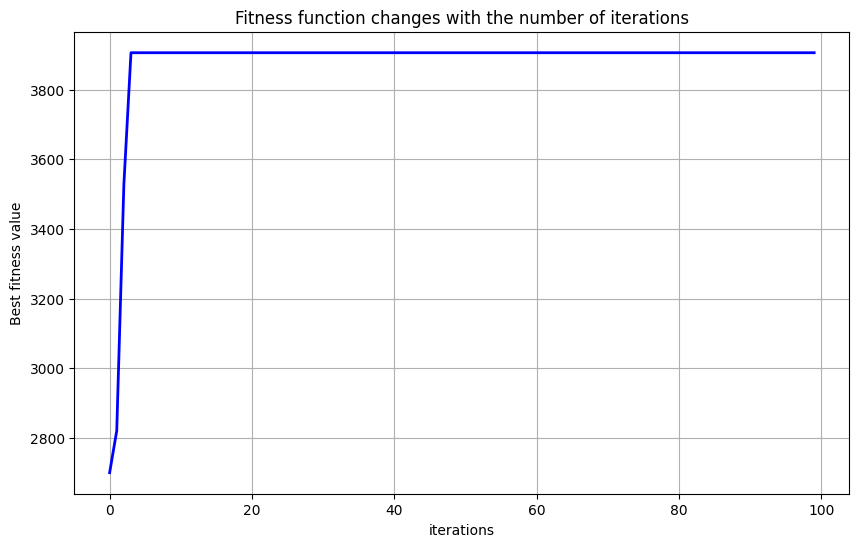

最优解: [-2.048 -2.048], 最优值: 3905.9262268415996


In [3]:
import numpy as np

# Rosenbrock函数定义
def rosenbrock(x):
    return 100 * (x[0]**2 - x[1])**2 + (1 - x[0])**2

# PSO算法实现
def pso_rosenbrock():
    # 参数设置
    size = 50          # 粒子数量
    dim = 2            # 维度
    G = 100            # 最大迭代次数
    c1, c2 = 1.3, 1.7  # 学习因子
    w_max, w_min = 0.9, 0.1  # 惯性权重范围
    x_min, x_max = -2.048, 2.048  # 搜索空间范围
    v_max = 1.0        # 最大速度

    # 添加用于记录适应度变化的列表
    fitness_history = []    

    # 初始化粒子位置和速度
    X = np.random.uniform(x_min, x_max, (size, dim))
    V = np.random.uniform(-v_max, v_max, (size, dim))
    
    # 初始化个体最优和全局最优
    pbest = X.copy()
    pbest_fitness = np.array([rosenbrock(x) for x in X])
    gbest = X[np.argmax(pbest_fitness)]
    gbest_fitness = np.max(pbest_fitness)
    
    # 邻域设置（环形邻域）
    neighborhood_size = 5
    neighbors = [np.arange(i-neighborhood_size//2, i+neighborhood_size//2+1) % size 
                 for i in range(size)]
    
    # 迭代过程
    for t in range(G):

        # 记录当前代的最佳适应度
        fitness_history.append(gbest_fitness)

        # 计算当前惯性权重
        w = w_max - (w_max - w_min) * t / G
        
        # 更新速度和位置
        for i in range(size):
            # 找到局部最优
            local_best_idx = neighbors[i][np.argmax([rosenbrock(X[j]) for j in neighbors[i]])]
            plocal = X[local_best_idx]
            
            # 更新速度
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            V[i] = (w * V[i] + 
                    c1 * r1 * (pbest[i] - X[i]) + 
                    c2 * r2 * (plocal - X[i]))
            
            # 速度边界检查
            V[i] = np.clip(V[i], -v_max, v_max)
            
            # 更新位置
            X[i] += V[i]
            
            # 位置边界检查
            X[i] = np.clip(X[i], x_min, x_max)
            
            # 更新个体最优
            current_fitness = rosenbrock(X[i])
            if current_fitness > pbest_fitness[i]:
                pbest[i] = X[i]
                pbest_fitness[i] = current_fitness
                
                # 更新全局最优
                if current_fitness > gbest_fitness:
                    gbest = X[i]
                    gbest_fitness = current_fitness
        
        # 自适应变异
        if t % 10 == 0:
            mutation_rate = 0.1 * (1 - t/G)
            for i in range(size):
                if np.random.rand() < mutation_rate:
                    X[i] += np.random.normal(0, 0.1, dim)
                    X[i] = np.clip(X[i], x_min, x_max)

    # 绘图
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(range(G), fitness_history, 'b-', linewidth=2)
    plt.title('Fitness function changes with the number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('Best fitness value')
    plt.grid(True)
    plt.show()
    
    return gbest, gbest_fitness

# 运行算法并输出结果
best_solution, best_fitness = pso_rosenbrock()
print(f"最优解: {best_solution}, 最优值: {best_fitness}")

# 例3 隶属函数

- 高斯隶属函数

$$
f(x, \sigma, c) = e^{-\frac{(x-c)^2}{2\sigma^2}}
$$

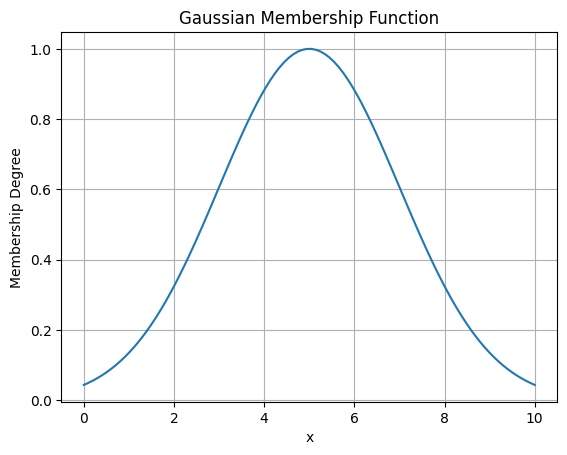

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义高斯隶属函数
def gaussian(x, sigma=2, c=5):
    return np.exp(-((x - c)**2) / (2 * sigma**2))

# 生成x值
x = np.linspace(0, 10, 100)

# 计算y值
y = gaussian(x)

# 绘制图形
plt.plot(x, y, label='Gaussian Membership Function')
plt.title("Gaussian Membership Function")
plt.xlabel("x")
plt.ylabel("Membership Degree")
#plt.legend()  # 显示图例
plt.grid(True)
plt.show()

- 广义钟形隶属函数

$$
f(x, a, b, c) = \frac{1}{1 + \left|\frac{x-c}{a}\right|^{2b}}
$$

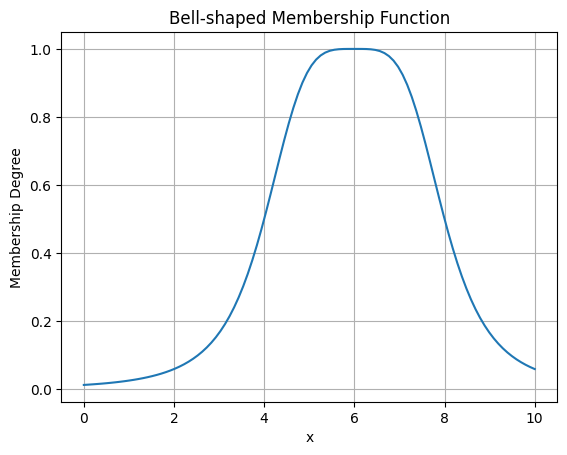

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义广义钟形隶属函数
def bell_shaped(x, a=2, b=2, c=6):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# 生成x值
x = np.linspace(0, 10, 100)

# 计算y值
y = bell_shaped(x)

# 绘制图形
plt.plot(x, y, label='Bell-shaped Membership Function')
plt.title("Bell-shaped Membership Function")
plt.xlabel("x")
plt.ylabel("Membership Degree")
#plt.legend()
plt.grid(True)
plt.show()

- S形隶属函数

$$
f(x, a, c) = \frac{1}{1 + e^{-a(x-c)}}
$$

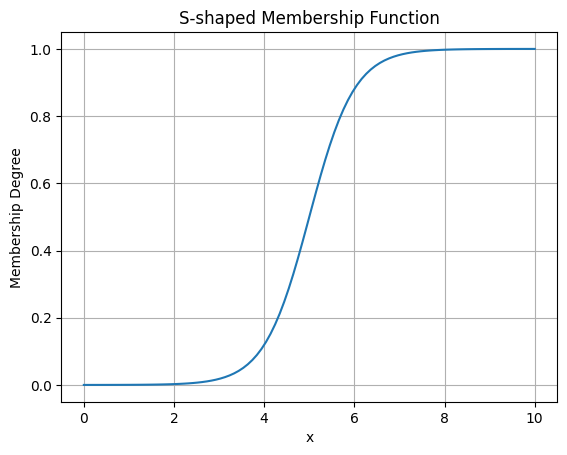

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义S形隶属函数
def s_shaped(x, a=2, c=5):
    return 1 / (1 + np.exp(-a * (x - c)))

# 生成x值
x = np.linspace(0, 10, 100)

# 计算y值
y_s = s_shaped(x)

# 绘制图形
plt.plot(x, y_s, label='S-shaped Membership Function')
plt.title("S-shaped Membership Function")
plt.xlabel("x")
plt.ylabel("Membership Degree")
#plt.legend()
plt.grid(True)
plt.show()

- 梯形隶属函数

$$
f(x, a, b, c, d) = 
\begin{cases} 
0 & x \leq a \\
\frac{x-a}{b-a} & a < x \leq b \\
1 & b < x \leq c \\
\frac{d-x}{d-c} & c < x \leq d \\
0 & x \geq d 
\end{cases}
$$

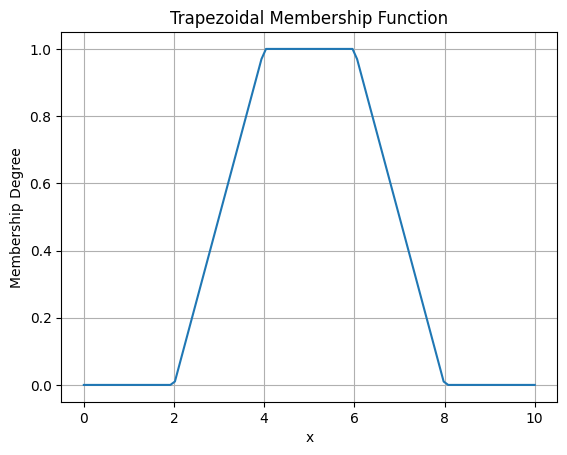

In [7]:
'''
这段代码会生成一个梯形隶属函数图形，其中：

a=2：梯形左边界
b=4：梯形左肩
c=6：梯形右肩
d=8：梯形右边界 你可以通过调整这些参数来改变梯形的形状和位置。
'''

import numpy as np
import matplotlib.pyplot as plt

# 定义梯形隶属函数
def trapezoidal(x, a=2, b=4, c=6, d=8):
    return np.piecewise(x, [
        x <= a,
        (a < x) & (x <= b),
        (b < x) & (x <= c),
        (c < x) & (x <= d),
        x >= d
    ], [
        0,
        lambda x: (x - a) / (b - a),
        1,
        lambda x: (d - x) / (d - c),
        0
    ])

# 生成x值
x = np.linspace(0, 10, 100)

# 计算y值
y_trap = trapezoidal(x)

# 绘制图形
plt.plot(x, y_trap, label='Trapezoidal Membership Function')
plt.title("Trapezoidal Membership Function")
plt.xlabel("x")
plt.ylabel("Membership Degree")
#plt.legend()
plt.grid(True)
plt.show()

- 三角形隶属函数

$$
f(x, a, b, c) = 
\begin{cases} 
0 & x \leq a \\
\frac{x-a}{b-a} & a < x \leq b \\
\frac{c-x}{c-b} & b < x \leq c \\
0 & x > c 
\end{cases}
$$

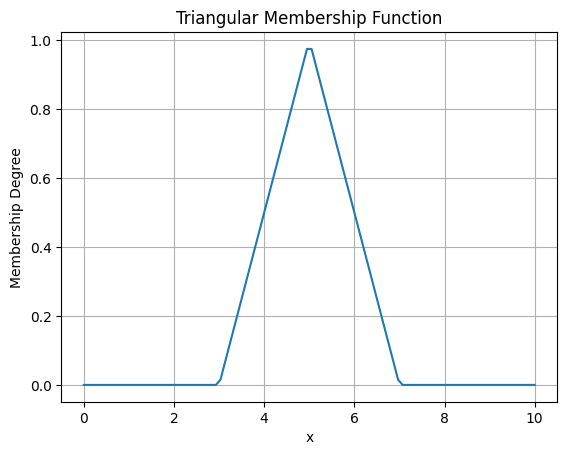

In [8]:
'''
这段代码会生成一个三角形隶属函数图形，其中：

a=3：三角形左边界
b=5：三角形顶点
c=7：三角形右边界 你可以通过调整这些参数来改变三角形的形状和位置。
'''

import numpy as np
import matplotlib.pyplot as plt

# 定义三角形隶属函数
def triangular(x, a=3, b=5, c=7):
    return np.piecewise(x, [
        x <= a,
        (a < x) & (x <= b),
        (b < x) & (x <= c),
        x > c
    ], [
        0,
        lambda x: (x - a) / (b - a),
        lambda x: (c - x) / (c - b),
        0
    ])

# 生成x值
x = np.linspace(0, 10, 100)

# 计算y值
y_tri = triangular(x)

# 绘制图形
plt.plot(x, y_tri, label='Triangular Membership Function')
plt.title("Triangular Membership Function")
plt.xlabel("x")
plt.ylabel("Membership Degree")
#plt.legend()
plt.grid(True)
plt.show()

- Z形隶属函数
  
$$
f(x; a, b) = 
\begin{cases} 
1, & x \leq a \\
1 - 2\left(\frac{x-a}{b-a}\right)^2, & a \leq x \leq \frac{a+b}{2} \\
2\left(\frac{x-b}{b-a}\right)^2, & \frac{a+b}{2} \leq x \leq b \\
0 & x \geq b
\end{cases}
$$

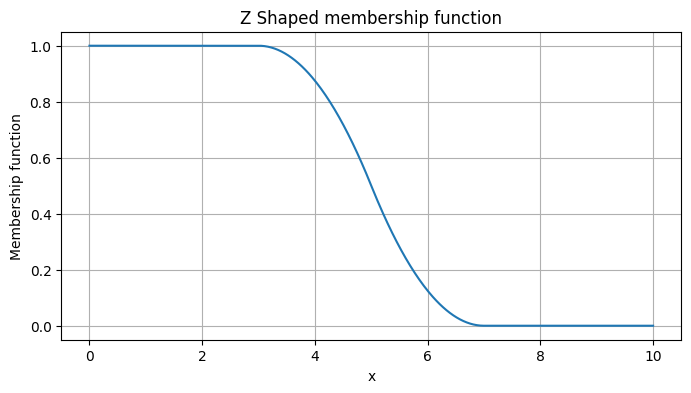

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def z_membership(x, a, b):
    if x <= a:
        return 1
    elif a <= x <= (a+b)/2:
        return 1 - 2*((x-a)/(b-a))**2
    elif (a+b)/2 <= x <= b:
        return 2*((x-b)/(b-a))**2
    else:
        return 0

# 参数设置
a = 3
b = 7
x_values = np.linspace(0, 10, 500)
y_values = [z_membership(x, a, b) for x in x_values]

# 绘制图形
plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values, label=f'Z Shaped membership function (a={a}, b={b})')
plt.title('Z Shaped membership function')
plt.xlabel('x')
plt.ylabel('Membership function')
#plt.legend()
plt.grid(True)
plt.show()

# 例4 模糊理论案例

实例：设计评价一个学生成绩的隶属函数，在$[0，100]$之内按$A、B、C、D、E$分为五个等级，即{不及格，及格，中，良，优}。分别采用五个高斯型隶属函数来表示，建立一个模糊系统。


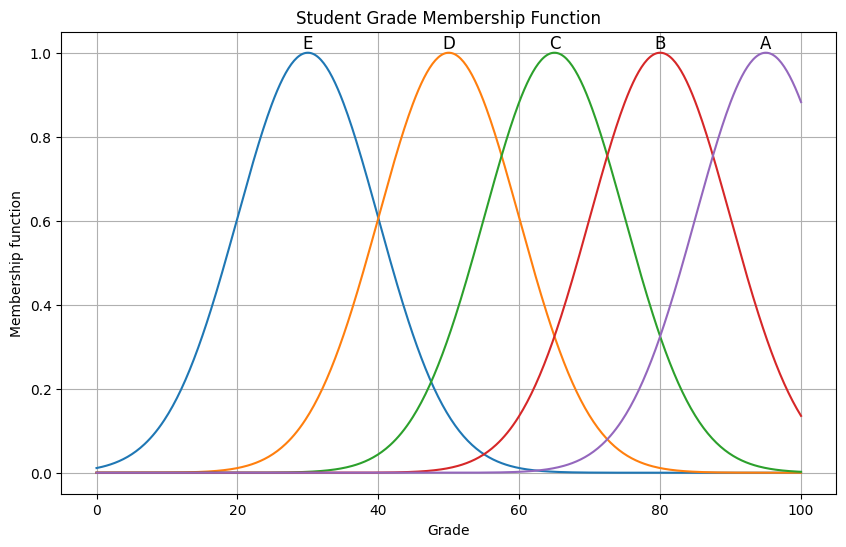

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_membership(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# 定义五个等级的隶属函数参数
grades = {
    'E': {'mean': 30, 'sigma': 10},  # 不及格
    'D': {'mean': 50, 'sigma': 10},  # 及格
    'C': {'mean': 65, 'sigma': 10},  # 中
    'B': {'mean': 80, 'sigma': 10},  # 良
    'A': {'mean': 95, 'sigma': 10}   # 优
}

# 生成x值
x_values = np.linspace(0, 100, 500)

# 绘制每个等级的隶属函数
plt.figure(figsize=(10, 6))
for grade, params in grades.items():
    y_values = gaussian_membership(x_values, params['mean'], params['sigma'])
    plt.plot(x_values, y_values, label=f'{grade}')
    # 在每个曲线的顶部添加标签
    plt.text(params['mean'], 1, grade, ha='center', va='bottom', fontsize=12)

plt.title('Student Grade Membership Function')
plt.xlabel('Grade')
plt.ylabel('Membership function')
#plt.legend()
plt.grid(True)
plt.show()

# 例五 模糊控制

${\triangle}{\theta}$的隶属函数。

C:\Users\wto81\AppData\Local\Temp\ipykernel_16720\142397014.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(0, np.minimum((x - a)/(b - a), (c - x)/(c - b)))
C:\Users\wto81\AppData\Local\Temp\ipykernel_16720\142397014.py:9: RuntimeWarning: invalid value encountered in divide
  return np.maximum(0, np.minimum((x - a)/(b - a), (c - x)/(c - b)))


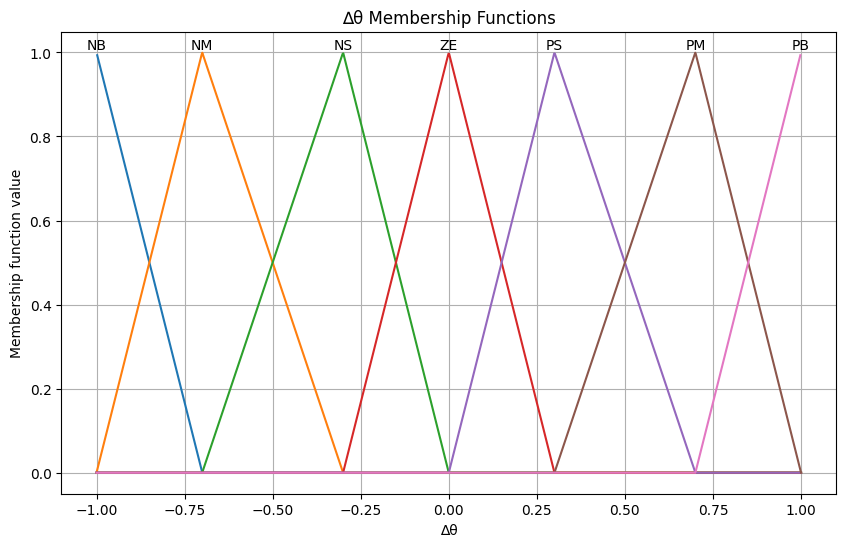

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义论域
x = np.linspace(-1, 1, 1000)

# 定义三角形隶属函数
def trimf(x, a, b, c):
    return np.maximum(0, np.minimum((x - a)/(b - a), (c - x)/(c - b)))

# 定义七个模糊集的参数
params = {
    'NB': (-1, -1, -0.7),
    'NM': (-1, -0.7, -0.3),
    'NS': (-0.7, -0.3, 0),
    'ZE': (-0.3, 0, 0.3),
    'PS': (0, 0.3, 0.7),
    'PM': (0.3, 0.7, 1),
    'PB': (0.7, 1, 1)
}

# 绘制隶属函数
plt.figure(figsize=(10, 6))
for label, (a, b, c) in params.items():
    y = trimf(x, a, b, c)
    plt.plot(x, y, label=label)
    # 在每条曲线的顶部添加图例
    peak_x = b  # 三角形顶点位置
    peak_y = 1  # 最大隶属度
    plt.text(peak_x, peak_y, label, ha='center', va='bottom')

plt.title('∆θ Membership Functions')
plt.xlabel('∆θ')
plt.ylabel('Membership function value')
plt.grid(True)
plt.show()